In [ ]:
"""Exploratory Data Analysis step on merged df"""

In [ ]:
print(merged_df.info())
print(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514528 entries, 0 to 514527
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Warehouse               514528 non-null  object        
 1   Product_Code            514528 non-null  object        
 2   SupplierID              514528 non-null  object        
 3   ManufID                 514528 non-null  object        
 4   WH1                     514528 non-null  object        
 5   WH2                     483077 non-null  object        
 6   WH3                     392777 non-null  object        
 7   WH4                     196331 non-null  object        
 8   Time_Enroute            514528 non-null  int64         
 9   Destination             514528 non-null  object        
 10  Miles                   514528 non-null  float64       
 11  f1                      514528 non-null  float64       
 12  f2                      514528

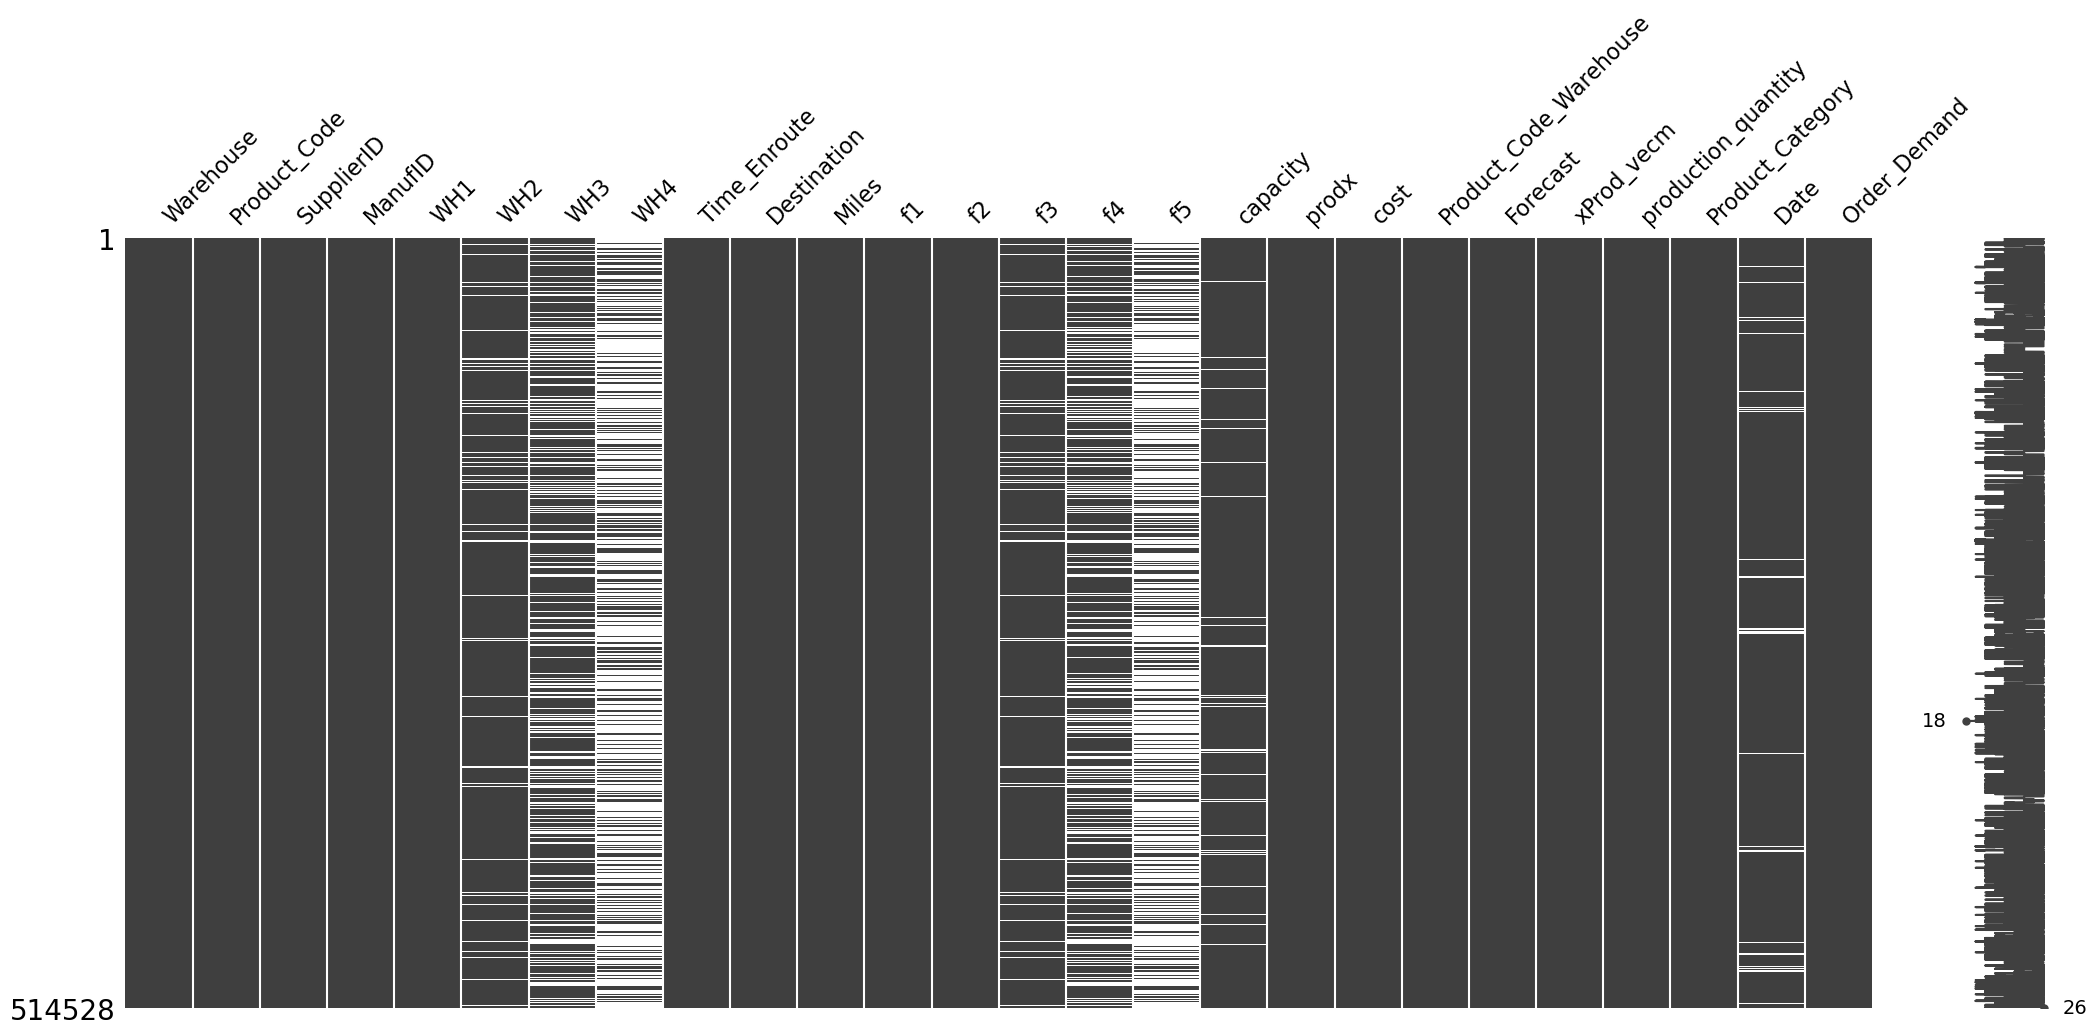

Warehouse                      0
Product_Code                   0
SupplierID                     0
ManufID                        0
WH1                            0
WH2                        31451
WH3                       121751
WH4                       318197
Time_Enroute                   0
Destination                    0
Miles                          0
f1                             0
f2                             0
f3                         31451
f4                        121751
f5                        318197
capacity                   17847
prodx                          0
cost                           0
Product_Code_Warehouse         0
Forecast                       0
xProd_vecm                     0
production_quantity            0
Product_Category               0
Date                       17349
Order_Demand                   0
dtype: int64


In [ ]:
# Visualize missing values
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(merged_df)
plt.show()

# Check for missing values
print(merged_df.isnull().sum())

/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


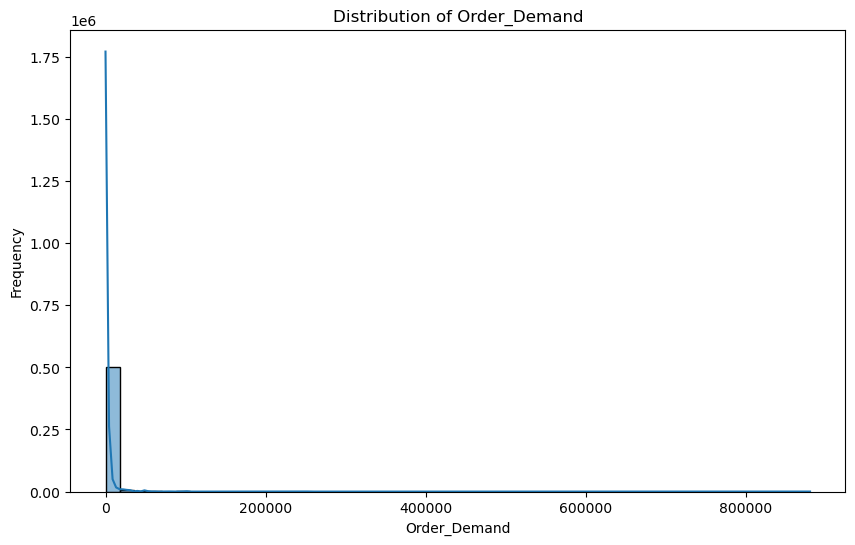

Skewness of Order_Demand: 26.021611022567072


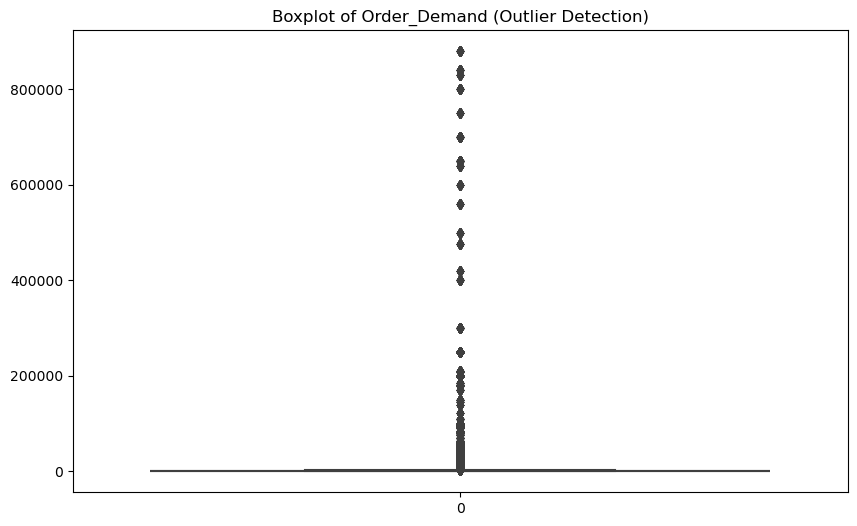

In [ ]:
""""More analysis after merge and data cleaning"""

# Plot distribution of Order_Demand
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Demand'], bins=50, kde=True)
plt.title('Distribution of Order_Demand')
plt.xlabel('Order_Demand')
plt.ylabel('Frequency')
plt.show()

# Check for skewness
print(f"Skewness of Order_Demand: {df['Order_Demand'].skew()}")

# Boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(df['Order_Demand'])
plt.title('Boxplot of Order_Demand (Outlier Detection)')
plt.show()

In [ ]:
"""
analysis on these diagrams: 

Histogram with KDE of Order_Demand: 
distribution is extremely right-skewed. Most of the demand values are clustered close to 0, and there is a long tail
spike near 0 indicates that a large portion of the dataset consists of relatively small orders, while the demand for larger orders diminishes significantly but still exists in the dataset

Boxplot for Outlier Detection:
confirms the presence of many outliers in the dataset
Interquartile Range) is small, indicating that most of the data is concentrated in a narrow range of values.
There are a large number of outliers on the upper side (values significantly greater than the rest of the data), with values exceeding 800,000.

skewness and outliers tell us that most of the Order_Demand in the dataset is for small quantities, but a few large orders dominate the upper end of the distribution.
dataset is highly imbalanced in terms of demand, with the majority of data points representing small orders and a minority representing extremely large orders.

imbalance can lead to challenges in predictive modeling:
Models might overfit to the small, frequent orders, underestimating the rare but high-demand orders
Outliers can heavily influence model performance
"""

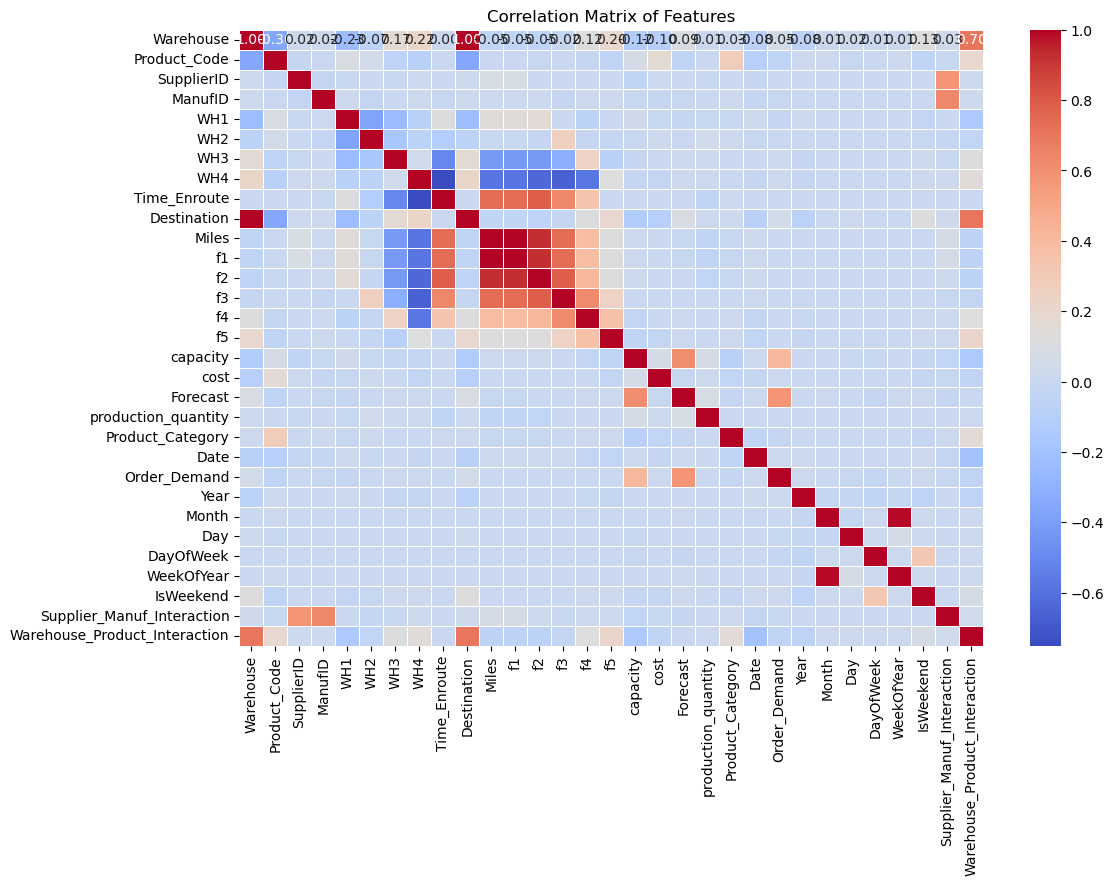

Order_Demand                     1.000000
Forecast                         0.583578
capacity                         0.408750
Warehouse                        0.052763
Destination                      0.052763
IsWeekend                        0.017838
Year                             0.016779
Date                             0.014017
cost                             0.011567
WH3                              0.010210
WH4                              0.008450
f4                               0.005020
SupplierID                       0.004205
f3                               0.004024
f2                               0.003981
Month                            0.002145
Miles                            0.001851
f1                               0.001851
WeekOfYear                       0.001545
production_quantity              0.001522
Time_Enroute                     0.001328
WH2                             -0.002131
f5                              -0.002911
Supplier_Manuf_Interaction      -0

In [ ]:
# Feature Correlation Matrix 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Check correlation between individual features and the target
print(corr_matrix['Order_Demand'].sort_values(ascending=False))

In [ ]:
"""
Interpretations from dataset:
can observe clusters of features, eg. f1, f2, f3, f4, and f5
features like Warehouse_Product_Interaction and Supplier_Manuf_Interaction show isolated patches of strong correlation with other features.
Features like Warehouse, SupplierID, and ManufID appear to have low correlations with most other features, indicating they are more independent.
Product_Code, SupplierID, ManufID, and Product_Category show very low or no correlation with other features, suggesting they may be categorical
Forecast, capacity, and cost also show strong correlations with some other features, indicating these could be highly influential variables in predicting Order_Demand.
Order Demand, seems to have moderate correlations with a few features, such as the f-series and interactions 
"""

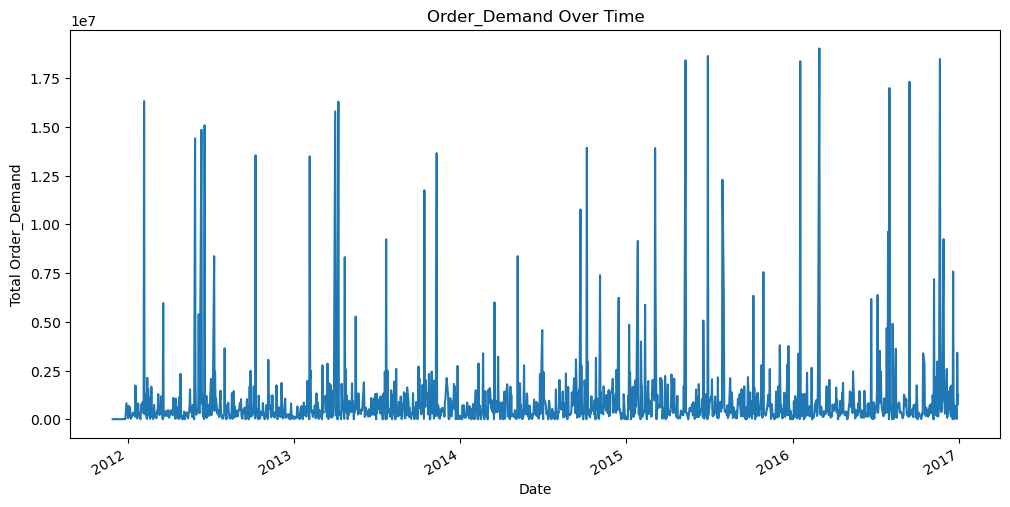

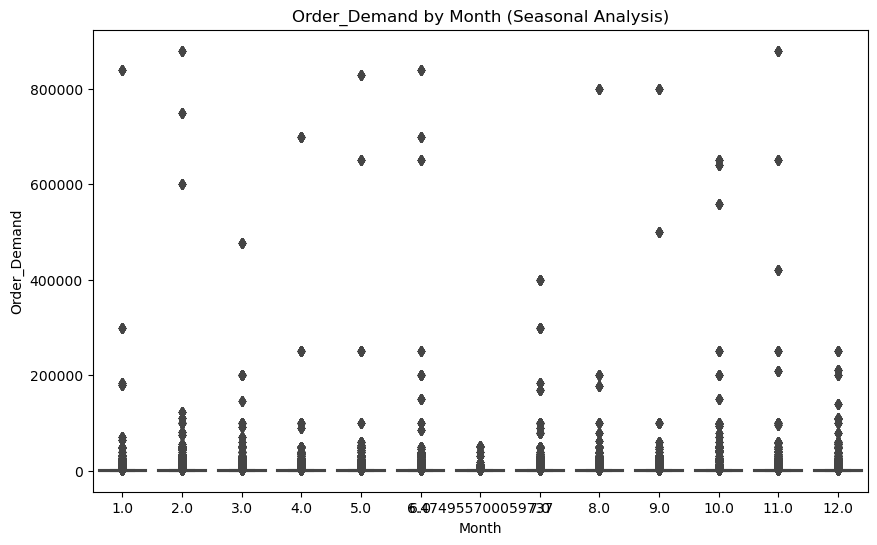

In [ ]:
# Plot Order_Demand over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df.groupby('Date')['Order_Demand'].sum().plot()
plt.title('Order_Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order_Demand')
plt.show()

# Seasonal plot: Order_Demand by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Order_Demand', data=df)
plt.title('Order_Demand by Month (Seasonal Analysis)')
plt.show()

In [ ]:
"""
interpretation:

Most data points are lower values, with frequent occurrences of high demand. 
There seems to be no distinct pattern that one month has consistently higher demand. 

There are outliers across the whole year, some notably in March and July. 
Demand distribution seems heavily skewed, with mainly small orders and large infrequent spikes. 

The plot suggests that Order_Demand exhibits high variance, and demand spikes seem to occur sporadically rather than being tied to a strong monthly or seasonal trend.
this implies an unpredictable demand patterns for the dataset.
More factors must be considered beyond just seasonal analysis.

"""